You've already imported pandas as pd in a previous cell. How can I assist you further with your data analysis?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

# Data Latih

In [ ]:
data_train.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


# Data Uji

In [ ]:
data_test.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


# One Hot Encoding

In [ ]:
the_dummies = pd.get_dummies(data_train['Geography']).astype('int')
the_dummies2 = pd.get_dummies(data_train['Gender']).astype('int')
data_train = pd.concat([data_train, the_dummies], axis=1)
data_train = pd.concat([data_train, the_dummies2], axis=1)
data_train.drop('Geography', axis=1, inplace=True)
data_train.drop('Gender', axis=1, inplace=True)

In [ ]:
the_dummies3 = pd.get_dummies(data_test['Geography']).astype('int')
the_dummies4 = pd.get_dummies(data_test['Gender']).astype('int')
data_test = pd.concat([data_test, the_dummies3], axis=1)
data_test = pd.concat([data_test, the_dummies4], axis=1)
data_test.drop('Geography', axis=1, inplace=True)
data_test.drop('Gender', axis=1, inplace=True)

In [ ]:
# surname_dict = pd.concat([data_train, data_test],axis=0)['Surname'].value_counts().to_dict()
mask = data_train['Exited'] == 1
surname_dict = (len(data_train[mask]['Surname'])/data_train['Surname'].value_counts()).to_dict()

data_train['ExitedfamilySize'] = data_train['Surname'].apply(lambda x: surname_dict.get(x))
# data_test['ExitedfamilySize'] = data_test['Surname'].apply(lambda x: surname_dict.get(x)/len(data_test[mask]['Surname']))
data_test['ExitedfamilySize'] = data_test['Surname'].apply(lambda x: surname_dict.get(x) / len(data_test[data_test['Surname'] == x]))
data_train.drop('Surname', axis=1, inplace = True)
data_test.drop('Surname', axis=1, inplace = True)


KeyboardInterrupt: 

In [ ]:
data_train['NotExitedfamilySize'] = data_train['ExitedfamilySize'].apply(lambda x: 1-x)
data_test['NotExitedfamilySize'] = data_test['ExitedfamilySize'].apply(lambda x: 1-x)

In [ ]:
data_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1,0.003990,0.996010
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1,0.004899,0.995101
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1,0.019796,0.980204
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1,0.023422,0.976578
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1,0.003445,0.996555


In [ ]:
data_test.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,165034,15773898,586,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1,0,0.008544,0.991456
1,165035,15782418,683,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0,1,0,0.000309,0.999691
2,165036,15807120,656,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,1,0,0.009852,0.990148
3,165037,15808905,681,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,0,1,0.006717,0.993283
4,165038,15607314,752,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0,0,1,0.000145,0.999855


In [ ]:
exited_train = data_train['Exited']
data_train = data_train.rename(columns={'Exited': 'trash'})

data_train = pd.concat([data_train, exited_train], axis=1)
data_train.drop('trash', axis=1, inplace = True)
data_train.head()


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize,Exited
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,1,0.003990,0.996010,0
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1,0.004899,0.995101,0
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,1,0.019796,0.980204,0
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1,0.023422,0.976578,0
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,1,0.003445,0.996555,0


# Check Data

In [ ]:
data_test.isna().sum()

id                     0
CustomerId             0
CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
France                 0
Germany                0
Spain                  0
Female                 0
Male                   0
ExitedfamilySize       0
NotExitedfamilySize    0
dtype: int64

In [ ]:
data_train.isna().sum()

id                     0
CustomerId             0
CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
France                 0
Germany                0
Spain                  0
Female                 0
Male                   0
ExitedfamilySize       0
NotExitedfamilySize    0
Exited                 0
dtype: int64

# Melakukan Klasifikasi Naive Bayes

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   110023 non-null  int64  
 1   CustomerId           110023 non-null  int64  
 2   CreditScore          110023 non-null  int64  
 3   Age                  110023 non-null  float64
 4   Tenure               110023 non-null  int64  
 5   Balance              110023 non-null  float64
 6   NumOfProducts        110023 non-null  int64  
 7   HasCrCard            110023 non-null  float64
 8   IsActiveMember       110023 non-null  float64
 9   EstimatedSalary      110023 non-null  float64
 10  France               110023 non-null  int32  
 11  Germany              110023 non-null  int32  
 12  Spain                110023 non-null  int32  
 13  Female               110023 non-null  int32  
 14  Male                 110023 non-null  int32  
 15  ExitedfamilySize 

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   165034 non-null  int64  
 1   CustomerId           165034 non-null  int64  
 2   CreditScore          165034 non-null  int64  
 3   Age                  165034 non-null  float64
 4   Tenure               165034 non-null  int64  
 5   Balance              165034 non-null  float64
 6   NumOfProducts        165034 non-null  int64  
 7   HasCrCard            165034 non-null  float64
 8   IsActiveMember       165034 non-null  float64
 9   EstimatedSalary      165034 non-null  float64
 10  France               165034 non-null  int32  
 11  Germany              165034 non-null  int32  
 12  Spain                165034 non-null  int32  
 13  Female               165034 non-null  int32  
 14  Male                 165034 non-null  int32  
 15  ExitedfamilySize 

<Axes: xlabel='Exited', ylabel='count'>

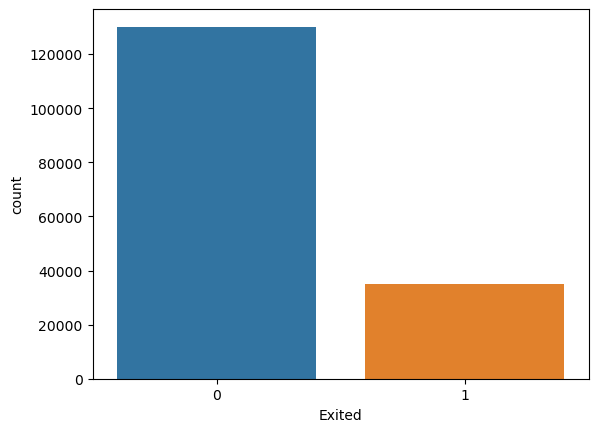

In [ ]:
import seaborn as sns
sns.countplot(x="Exited", data=data_train)

# Fungsi Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisasi(data):
    dt = data.copy()
    kolom_kontinu = dt.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Exclude 'id' and 'CustomerId' columns
    exclude_cols = ['id', 'CustomerId', 'Exited']
    kolom_kontinu = [col for col in kolom_kontinu if col not in exclude_cols]

    print(kolom_kontinu)
    
    scaler = MinMaxScaler()
    dt[kolom_kontinu] = scaler.fit_transform(dt[kolom_kontinu])
    return dt


In [ ]:
norm_train = normalisasi(data_train)
norm_test = normalisasi(data_test)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ExitedfamilySize', 'NotExitedfamilySize']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'ExitedfamilySize', 'NotExitedfamilySize']


In [ ]:
norm_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize,Exited
0,0,15674932,0.636,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,1,0,0,0,1,0.107855,0.892145,0
1,1,15749177,0.554,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,1,0,0,0,1,0.132480,0.867520,0
2,2,15694510,0.656,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,1,0,0,0,1,0.536075,0.463925,0
3,3,15741417,0.462,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,1,0,0,0,1,0.634327,0.365673,0
4,4,15766172,0.732,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0,0,1,0,1,0.093081,0.906919,0


In [ ]:
norm_test.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,ExitedfamilySize,NotExitedfamilySize
0,165034,15773898,0.472,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,1,0,0,1,0,0.231224,0.768776
1,165035,15782418,0.666,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,1,0,0,1,0,0.008126,0.991874
2,165036,15807120,0.612,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,1,0,0,1,0,0.266683,0.733317
3,165037,15808905,0.662,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,1,0,0,0,1,0.181729,0.818271
4,165038,15607314,0.804,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0,1,0,0,1,0.003694,0.996306


In [ ]:
from collections import Counter

def hitung_prior(list_kelas):
    total_data = len(list_kelas)
    c_kelas = Counter(list_kelas)
    prior = {kelas: count / total_data for kelas, count in c_kelas.items()}
    return prior

In [ ]:
numeric_columns = norm_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
# categorical_columns = norm_train.select_dtypes(include=['object']).columns.tolist()

# data_kategorikal = norm_train[categorical_columns]
data_numerik = norm_train[numeric_columns]

label = numeric_columns.pop(-1)
label = norm_train[label]

print(label)


def count_mean_std_class(norm_train):
    list_columns = norm_train.columns
    list_class = set(label)
    rata2 = {}
    std = {}
    for column in list_columns:
        for a_class in list_class:
            rata2[(a_class,column)] = norm_train.loc[label == a_class][column].mean()
            std[(a_class,column)] = norm_train.loc[label==a_class][column].std()
    return(rata2,std)

import math
def likelihood_gaussian(data,rata2,std):
  hasil = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((data-rata2)**2))/(2*(std**2)))
  return hasil

def likelihood_multinomial(norm_train):
    columns = norm_train.columns.tolist()
    class_names = label.unique()
    likelihoods = {}
    for col in columns[:]:  
        for val in norm_train[col].unique():
            for class_name in class_names:
                subset_data = norm_train[label == class_name]
                count_val_given_class = len(subset_data[subset_data[col] == val])
                total_instances = len(subset_data)
                if count_val_given_class == 0:
                    likelihood = 0 
                else:
                    likelihood = count_val_given_class / total_instances
                likelihoods[(col, val, class_name)] = likelihood
    return likelihoods


0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64


# Training Gaussian and Multinomial 

In [ ]:
def training_naive_bayes_gaussian(data_train):

  # Hitung probabilitas prior
  prior = hitung_prior(label)

  # Hitung rata rata dan standar deviasi
  (rata2,std) = count_mean_std_class(data_train)

  list_class = set(label)
  list_columns = data_train.columns[:]
  model = {'prior': prior, 'rata2': rata2, 'std': std, 'list_class': list_class, 'list_columns': list_columns}
  return model

def training_naive_bayes_multinomial(data_train):

   # Simpan daftar kelas 
  columns = data_train.columns[:] 

  # Simpan daftar kelas
  classes = label.unique()

  # Hitung probabilitas prior
  prior_probabilities = hitung_prior(data_train)

  # Hitung likelihood
  likelihoods = likelihood_multinomial(data_train)

  model = {'prior': prior_probabilities, 'likelihoods': likelihoods, 'list_class': classes.tolist(), 'list_columns': columns.tolist()}
  return model

# data_kategorikal['Exited'] = label 

model_gaussian = training_naive_bayes_gaussian(data_numerik)
# model_multinomial = training_naive_bayes_multinomial(data_kategorikal)

print(model_gaussian)
# print(model_multinomial)


{'prior': {0: 0.7884011779390914, 1: 0.21159882206090866}, 'rata2': {(0, 'id'): 82454.49541552343, (1, 'id'): 82747.52438360872, (0, 'CustomerId'): 15692372.926817458, (1, 'CustomerId'): 15690634.222473584, (0, 'CreditScore'): 0.6151814192279018, (1, 'CreditScore'): 0.6044409381174651, (0, 'Age'): 0.250817302049923, (1, 'Age'): 0.35079023928140507, (0, 'Tenure'): 0.5048796046513416, (1, 'Tenure'): 0.49143781678646087, (0, 'Balance'): 0.20428935011710736, (1, 'Balance'): 0.28382032754627057, (0, 'NumOfProducts'): 0.205090959396832, (1, 'NumOfProducts'): 0.10928476656834951, (0, 'HasCrCard'): 0.7588941919715939, (1, 'HasCrCard'): 0.7355459465651041, (0, 'IsActiveMember'): 0.5522276790174694, (1, 'IsActiveMember'): 0.29486555367830247, (0, 'EstimatedSalary'): 0.5604170884565162, (1, 'EstimatedSalary'): 0.5720092101575405, (0, 'ExitedfamilySize'): 0.22127060683692304, (1, 'ExitedfamilySize'): 0.20940995315553104, (0, 'NotExitedfamilySize'): 0.7787293931630748, (1, 'NotExitedfamilySize'): 0

In [ ]:
def testing_naive_bayes_gaussian(model,norm_test):
  prior = model['prior']
  rata2 = model['rata2']
  std = model['std']
  list_class = model['list_class']
  list_columns = model['list_columns']

  posterior = dict.fromkeys(list_class,1)
  for a_class in list_class:
    for column in list_columns[:-1]:
      posterior[a_class] = posterior[a_class]*likelihood_gaussian(norm_test[column],rata2[(a_class,column)],std[(a_class,column)])
    posterior[a_class] = posterior[a_class] * prior[a_class]
  

  filtered_probs = {key: value for key, value in posterior.items() if key == 1}
  # Kembalikan key dan value untuk kebutuhan merge nanti
  kelas_uji = max(filtered_probs.items(), key=lambda x: x[1])

  return kelas_uji


def testing_naive_bayes_multinomial(model, norm_test):
    prior_probabilities = model['prior']
    likelihoods = model['likelihoods']
    classes = model['list_class']
    columns = model['list_columns']

    posterior_probabilities = {}

    # Hitung posterior probability untuk setiap kelas
    for cls in classes[:]:
        posterior_prob = prior_probabilities['Exited']
        for col in columns[:-1]:
            val = norm_test[col]
            try:
                likelihood = likelihoods[(col, val, cls)]
            except KeyError:
                likelihood = 0; 
            posterior_prob *= likelihood
        posterior_probabilities[cls] = posterior_prob
    
    filtered_probs = {key: value for key, value in posterior_probabilities.items() if key == 1}

    # print(filtered_probs.items())
    # print(filtered_probs)
    # Ambil kelas dengan posterior probability tertinggi sebagai prediksi kembalikan key dan value untuk kebutuhan merge nanti
    predicted_class, max_prob = max(filtered_probs.items(), key=lambda x: x[1])
    return predicted_class, max_prob


In [ ]:
# print(model_multinomial['list_class'])

In [ ]:
correct_predict_temp = []


# prediksi_total_multinomial=[]
# for indeks in range(norm_test.shape[0]):
#   prediksi_total_multinomial.append(testing_naive_bayes_multinomial(model_multinomial,norm_test.iloc[indeks]))

# df_prediksi = pd.DataFrame(prediksi_total_multinomial)
# df_prediksi['id'] = norm_test['id'] 
# df_prediksi.rename(columns={0: 'Exited'}, inplace=True)
# df_prediksi.rename(columns={1: 'posterior'}, inplace=True)

# print(df_prediksi['Exited'].unique())

prediksi_total_gaussian =[]
for indeks in range(norm_test.shape[0]):
  prediksi_total_gaussian.append(testing_naive_bayes_gaussian(model_gaussian,norm_test.iloc[indeks]))

df_prediksi_2 = pd.DataFrame(prediksi_total_gaussian)
df_prediksi_2['id'] = norm_test['id']
df_prediksi_2.rename(columns={0: 'Exited'}, inplace=True)
df_prediksi_2.rename(columns={1: 'posterior'}, inplace=True)

print(df_prediksi_2['Exited'].unique())

[1]


In [ ]:
df_prediksi_2.head(10)

,Exited,posterior,id
0,1,6.806833e-14,165034
1,1,6.817970e-12,165035
2,1,6.067434e-12,165036
3,1,8.691445e-12,165037
4,1,1.834071e-12,165038
5,1,4.911446e-14,165039
6,1,1.240167e-11,165040
7,1,2.005598e-12,165041
8,1,5.525522e-13,165042
9,1,5.501282e-13,165043


In [ ]:
# for ind, ind2 in zip(df_prediksi_2.index, df_prediksi.index):
#     if df_prediksi_2['posterior'][ind] > df_prediksi['posterior'][ind2]:
#         df_prediksi.at[ind2, 'posterior'] = df_prediksi_2['posterior'][ind]
#         df_prediksi.at[ind2, 'Exited'] = df_prediksi_2['Exited'][ind]

# print(df_prediksi['Exited'].unique())

jawaban = pd.DataFrame()

jawaban['id'] = df_prediksi_2['id']
jawaban['Exited'] = df_prediksi_2['posterior']

print(jawaban.head())

       id        Exited
0  165034  6.806833e-14
1  165035  6.817970e-12
2  165036  6.067434e-12
3  165037  8.691445e-12
4  165038  1.834071e-12


In [ ]:
jawaban.to_csv('jawaban.csv', index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Assuming data_train and data_test are your DataFrames with appropriate columns
# X_train and y_train should contain features and labels from data_train
X_train = data_train.drop(columns=['Exited'])  # Assuming 'Exited' is the target column
y_train = data_train['Exited']

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# X_test should contain features from data_test
X_test = data_test  # Assuming data_test contains features but not the target column

# Get the posterior probabilities for each class
posterior_probabilities = gnb.predict_proba(X_test)

# 'posterior_probabilities' will contain the probabilities for each class
print(posterior_probabilities)

# Assuming posterior_probabilities is the numpy array containing the probabilities
probabilities_class_1 = posterior_probabilities[:, 1]

# 'probabilities_class_1' will contain the probabilities for class 1
print(probabilities_class_1)

[[0.94996078 0.05003922]
 [0.76115016 0.23884984]
 [0.91017338 0.08982662]
 ...
 [0.93703019 0.06296981]
 [0.92006077 0.07993923]
 [0.83444773 0.16555227]]
[0.05003922 0.23884984 0.08982662 ... 0.06296981 0.07993923 0.16555227]


In [ ]:
jawaban_library = pd.DataFrame()

jawaban_library['id'] = jawaban['id']
jawaban_library['Exited'] = probabilities_class_1.tolist()

In [ ]:
jawaban_library.head()

,id,Exited
0,165034,0.050039
1,165035,0.238850
2,165036,0.089827
3,165037,0.098244
4,165038,0.210955


In [ ]:
jawaban_library.to_csv('jawaban_library2.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>